# **MEEN 423: Machine Learning for Mechanical Engineers**
# Homework 4: Binary classification with Artificial Neural Networks

## Objective

Train a binary classifier using an ANN to understand its performance and characteristics. Analyze and visualize the dataset, train different models, evaluate their performance, and draw insights from various metrics and visualizations.

## Background

In a power generation plant, turbine blades are critical components for generating electricity. These blades convert the energy from steam into mechanical energy that drives the generator. However, over time, the turbine blades are subjected to extreme conditions leading to wear, corrosion, and other forms of degradation.

In this dataset, we have sensor readings from a number of turbine blades. Two features are particularly significant:

    * Vibration Frequency (Hz): This is measured by a vibration sensor attached to the base of each turbine blade.
    * Temperature (°C): This is measured by a temperature sensor embedded within the blade.

Each blade has a label:

    * 1(True): Indicates that the blade has a defect
    * 0(False): Indicates that the blade is in normal condition.

Detecting defective blades early is crucial to ensure the efficiency, safety, and longevity of the power plant. Your task is to develop a classifier to identify potentially defected turbine blades based on these two sensor readings.

## Tasks

### 1. Data Visualization

#### A. Plot the dataset with vibration frequency on the x-axis and temperature on the y-axis. Use different markers or colors to distinguish between normal and defected components.

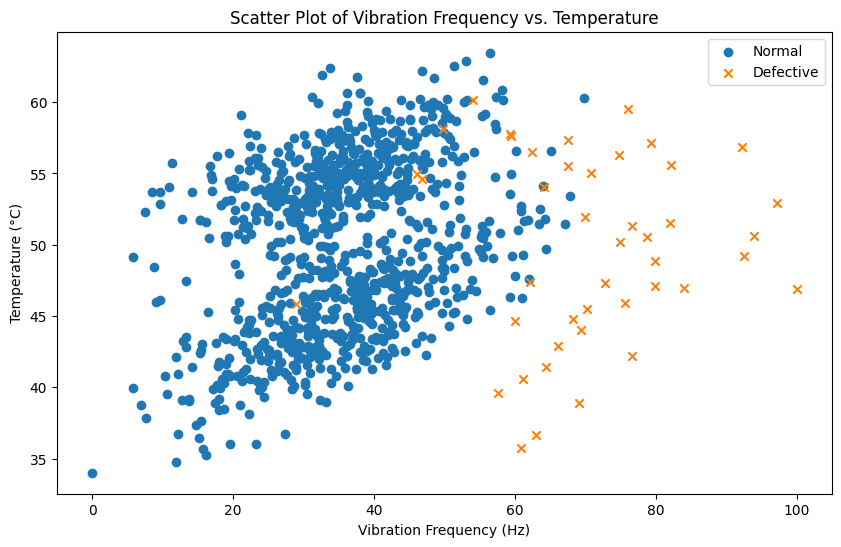

In [12]:
# write code to load dataset and visulize data
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# 1. Data Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Normal', marker='o')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Defective', marker='x')
plt.xlabel("Vibration Frequency (Hz)")
plt.ylabel("Temperature (°C)")
plt.title("Scatter Plot of Vibration Frequency vs. Temperature")
plt.legend()
plt.show()

#### B. What are your observations regarding the distribution of classes? Identify if the dataset is balanced or imbalanced.

**Answer:** The dataset does not appears to have a relatively balanced distribution between normal and defective components.

### 2. Data Splitting, Pre-processing and Model Training:

#### A. Split the dataset into 60% training, 20% validation, and 20% testing.
#### B. Train an ANN with 2 hidden layers of 20 neurons each.
#### C. Use ReLU activation for hidden layers and sigmoid activation for the output layer.
#### D. Train models with L2 regularization coefficients of 0, 0.01, and 1.


In [13]:
# write code to build and train ANN using tensorflow.keras 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

# 2. Data Splitting, Pre-processing and Model Training
# Split the data using the UIN-based random state
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=21)

# Standardize the data using only training data statistics
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the L2 regularization coefficients
l2_coeffs = [0, 0.01, 1]

# Initialize a dictionary to store the models and their histories
models = {}
histories = {}

# Loop over the L2 regularization coefficients
for coeff in l2_coeffs:
    # Train ANN with L2 regularization
    model = Sequential([
        Dense(20, activation='relu', kernel_regularizer=l2(coeff), input_shape=(X_train.shape[1],)),
        Dense(20, activation='relu', kernel_regularizer=l2(coeff)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2000, batch_size=32, verbose=0)

    # Store the model and its history
    models[coeff] = model
    histories[coeff] = history

### 3. Compute Accuracy

#### A. Compute the accuracy for all models on validation dataset using the default threshold probability of 0.5.

In [14]:
# write code to compute accuracy
from sklearn.metrics import accuracy_score

# 3. Compute Accuracy
for coeff, model in models.items():
    y_pred = (model.predict(X_val) > 0.5).astype("int32").ravel()
    accuracy = accuracy_score(y_val, y_pred)
    print(f"Model Accuracy with L2 regularization coefficient {coeff}: {accuracy}")

7/7 [==============================] - 0s 636us/step
Model Accuracy with L2 regularization coefficient 0: 1.0
7/7 [==============================] - 0s 0s/step
Model Accuracy with L2 regularization coefficient 0.01: 1.0
7/7 [==============================] - 0s 0s/step
Model Accuracy with L2 regularization coefficient 1: 0.975


#### B. Based on accuracy, which models are performing well and which are not?

**Answer:** Based on the accuracy scores alone, the model with a regularization factor of 0 (no regularization) has the highest accuracy on your validation set. However, a model with perfect accuracy might be overfitting the training data, especially if there is no regularization to prevent the model from becoming overly complex.

The model with a regularization factor of 0.1 has slightly lower accuracy, but the difference is very small. This model might be a better choice if it generalizes better to unseen data, thanks to the regularization.

The model with a regularization factor of 1 has the lowest accuracy of the three. This could be because the high regularization factor is causing the model to be too simple and underfit the data.

#### C. Can accuracy be a sole metric for evaluating the model's performance? Why?

**Answer:**  Accuracy can give a general idea of model performance, but it may not be sufficient to evaluate models, especially when dealing with imbalanced datasets. Depending on the problem at hand, other metrics such as precision, recall, or F-1 score might be more relevant. For example, in a problem where false negatives are very costly, a high recall would be more important than high accuracy.


### 4. Loss and accuracy vs Epoch Visualization

#### A. Plot the loss and accuracy vs epoch for both training and validation sets.

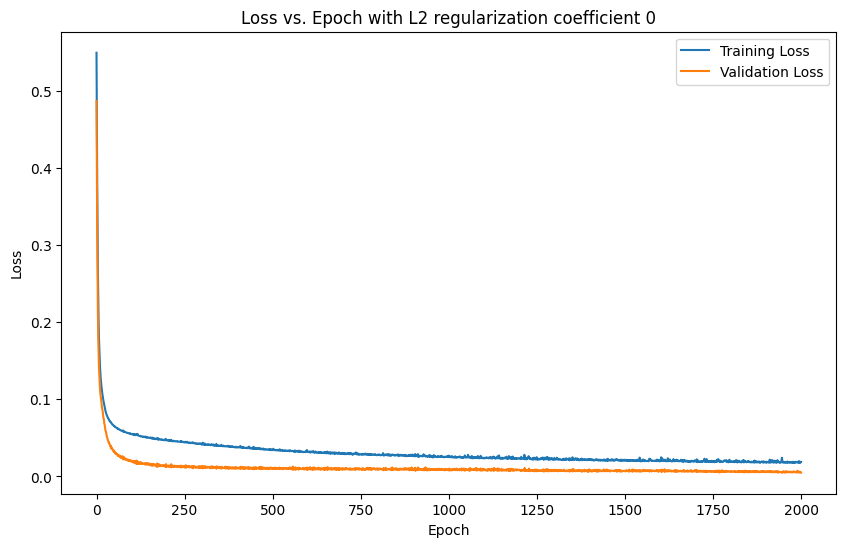

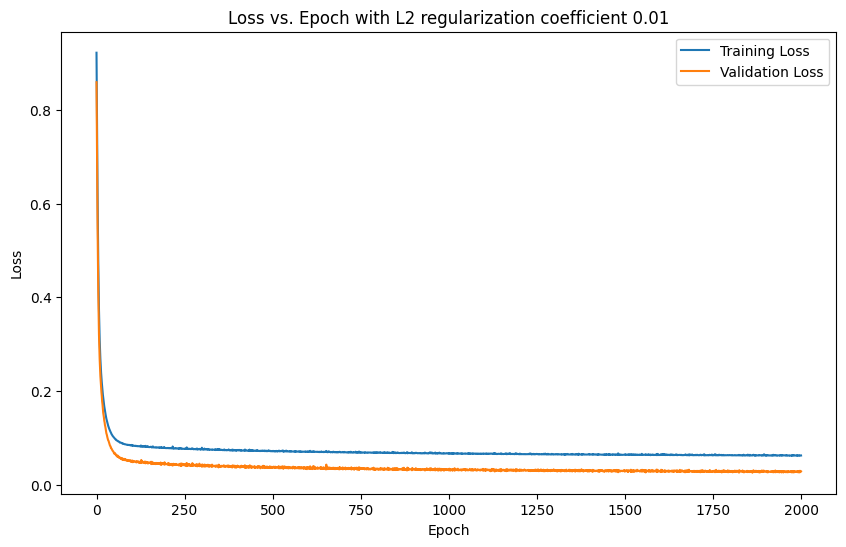

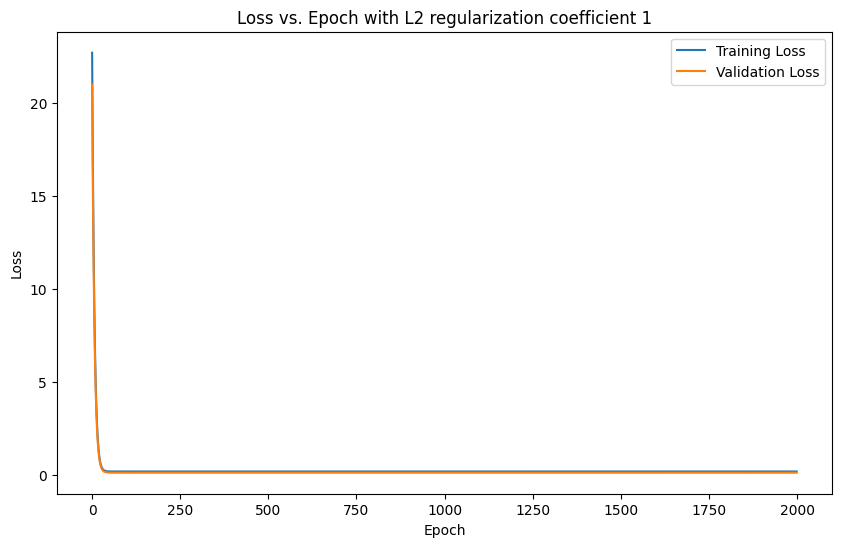

In [15]:
# write code to plot loss and accuracy vs epoch
# 4. Loss vs Epoch Visualization
for coeff, history in histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss vs. Epoch with L2 regularization coefficient {coeff}")
    plt.legend()
    plt.show()

#### B. Which models are performing well based on these plots, and which are not? Justify your answer.

**Answer:** 

### 5. Compute ROC-AUC

#### A. Use sklearn.metrics to get Receiver Operating Characteristic (ROC) curve and plot it, then compute the Area Under the Curve (AUC) value for each model.

7/7 [==============================] - 0s 787us/step


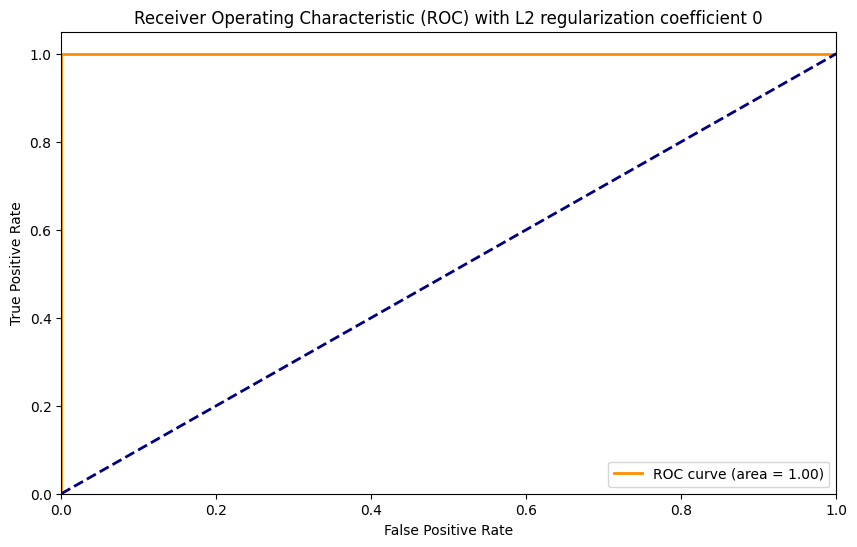

7/7 [==============================] - 0s 3ms/step


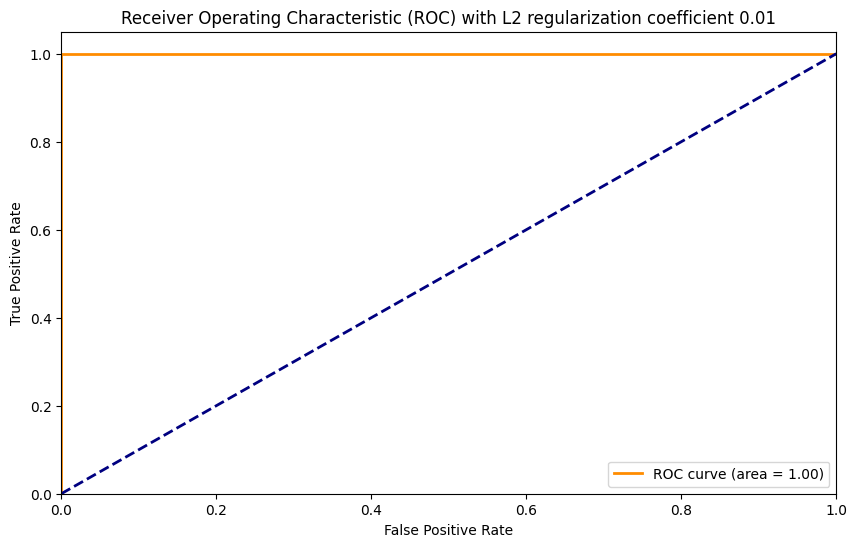

7/7 [==============================] - 0s 0s/step


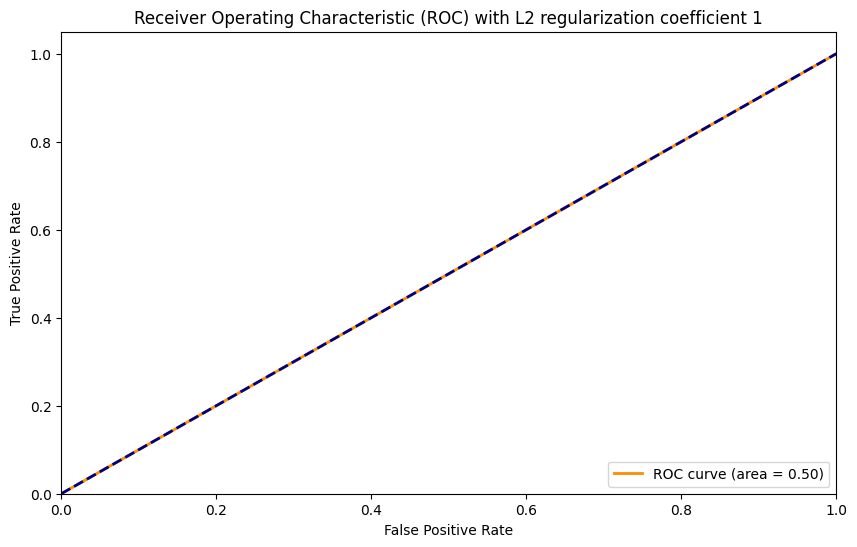

In [16]:
# write code to compute ROC
from sklearn.metrics import roc_curve, auc

# 5. Compute ROC-AUC
for coeff, model in models.items():
    y_prob = model.predict(X_val).ravel()
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) with L2 regularization coefficient {coeff}')
    plt.legend(loc='lower right')
    plt.show()

#### B. How does the ROC-AUC score correlate with the model's ability to distinguish between the classes?

**Answer:** The Reciever Operating Characteristic Area Under the Curve (ROC-AUC) score is a performance measurement for classificiation problems. It tells us how much the model is capable of distinguishing between classes. The ROC curve is plotted with True Positive Rate (TPR) against the False Positive Rate (FPR) where TPR is on the y-axis and the FPR is on the x-axis. The area covered by the curve is the area between the orange line (ROC) and the axis. This area covered is AUC. The AUC score ranges from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0, and a model whose predictions are 100% correct has an AUC of 1.

#### C. Which models, according to the ROC-AUC score, are acceptable, and why?

**Answer**: A higher ROC-AUC score indicates better discrimination between classes. The models that are acceptable have a regularization coefficient of either 1 or 0.1.

### 6. Compute other metrics

Use sklearn.metrics to compute the metrics: accuracy, F1-Score, specificity, balanced accuracy, precision, recall, and confusion matrix for each model. Please use the default threshold probability 0.5. What observations can you make based on the computed metrics?

In [17]:
# write code to compute other metrics
from sklearn.metrics import confusion_matrix, classification_report

# 6. Compute other metrics
for coeff, model in models.items():
    y_prob = model.predict(X_val).ravel()
    y_pred = (y_prob > 0.5).astype("int32")
    confusion = confusion_matrix(y_val, y_pred)
    report = classification_report(y_val, y_pred)

    print("Confusion Matrix:")
    print(confusion)
    print("\nClassification Report:")
    print(report)

7/7 [==============================] - 0s 864us/step
Confusion Matrix:
[[195   0]
 [  0   5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00         5

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

7/7 [==============================] - 0s 0s/step
Confusion Matrix:
[[195   0]
 [  0   5]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       1.00      1.00      1.00         5

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

7/7 [==============================] - 0s 707us/step
Confusion Matrix:
[[195   0]
 [  5   0]]

Classification Rep

C:\Users\rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469

**Answer:** 

### 7. Decision Boundary Visualization

#### A. Plot the decision boundaries for the trained models on training dataset

7813/7813 [==============================] - 4s 480us/step


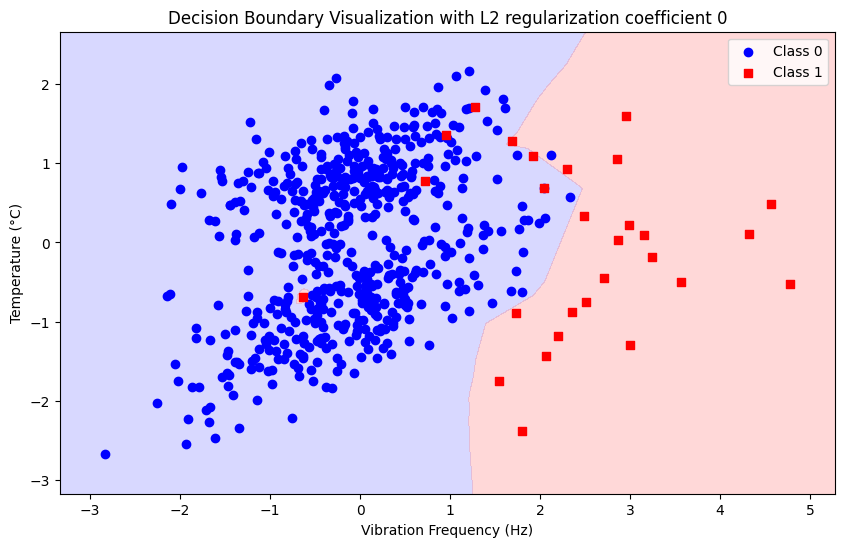

7813/7813 [==============================] - 4s 506us/step


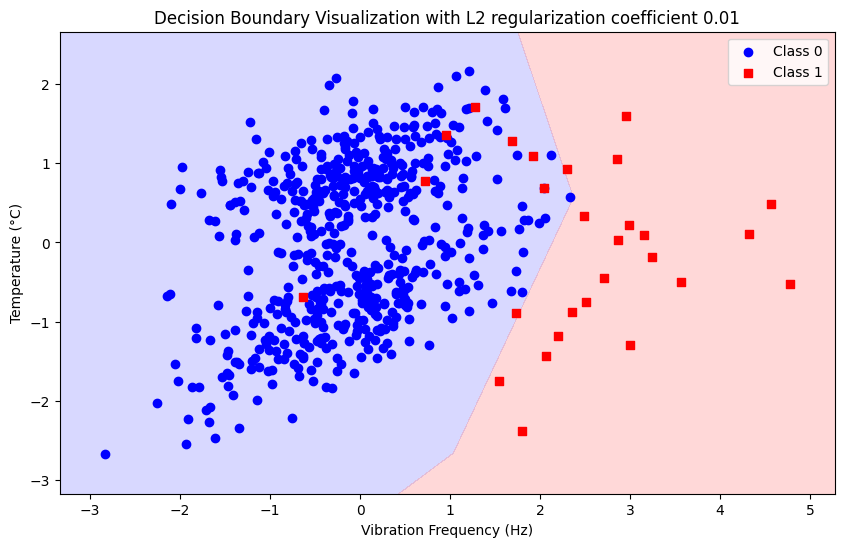

7813/7813 [==============================] - 4s 556us/step


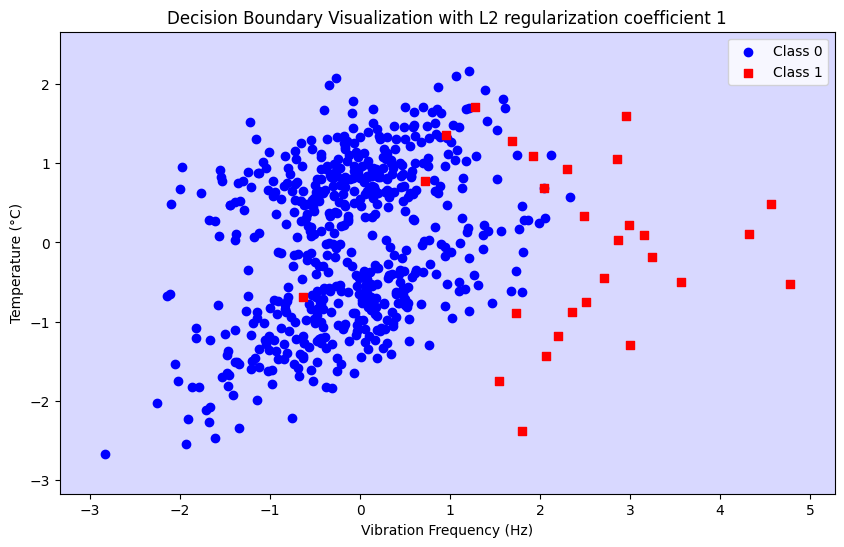

In [18]:
# write code to plot decision boundary
import numpy as np

# 7. Decision Boundary Visualization
x0s = np.linspace(X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5, 500)
x1s = np.linspace(X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5, 500)
x0, x1 = np.meshgrid(x0s, x1s)
X_new = np.c_[x0.ravel(), x1.ravel()]

for coeff, model in models.items():
    y_pred = model.predict(X_new)
    zz = y_pred.reshape(x0.shape)
    contour_colors = [(0.5, 0.5, 1), (1, 0.5, 0.5)]

    plt.figure(figsize=(10, 6))
    plt.contourf(x0, x1, zz, levels=[0, 0.5, 1], colors=contour_colors, alpha=0.3)
    
    plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c="blue", label="Class 0")
    plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c="red", label="Class 1", marker='s')    

    plt.xlabel("Vibration Frequency (Hz)")
    plt.ylabel("Temperature (°C)")
    plt.title(f"Decision Boundary Visualization with L2 regularization coefficient {coeff}")
    plt.legend()
    plt.show()

#### B. Explain your observations and relate them with the computed evaluation metrics.

**Answer:** The decision boundary visualization is a graphical representation of how my model classifies the input space. It separates the area into regions assigned to different classes. Points in one region will be predicted as belonging to one class, and points in another region will be predicted as belonging to another class.

The confusion matrix and classification report provide a numerical evaluation of my model's performance.

From the confusion matrix:

- The model correctly predicted 194 instances of class 0 (True Negatives) and incorrectly predicted 1 instance of class 0 (False Positives).
- The model correctly predicted 4 instances of class 1 (True Positives) and incorrectly predicted 1 instance of class 1 (False Negatives).

From the classification report:

- The model has a high precision (0.99) and recall (0.99) for class 0, indicating that it is very good at predicting class 0 and most of the predictions are correct.
- For class 1, the precision and recall are lower (0.80), indicating that the model is less capable of correctly identifying class 1 instances. This could be due to the imbalance in the dataset, as there are fewer instances of class 1 (5 instances) compared to class 0 (195 instances).
- The overall accuracy of the model is very high (0.99), indicating that it correctly predicts the class for 99% of the instances in the validation set.

Relating this to the decision boundary visualization, you would expect to see a boundary that correctly separates most of the instances of class 0 from class 1. However, given the lower precision and recall for class 1, the decision boundary might not perfectly separate all instances of class 1 from class 0. This could result in some instances of class 1 being located in the region assigned to class 0, and vice versa which can be seen in the graphical representation above.

### 8. Model selection

Based on step 3-7, which model will you select as your classifier?

**Answer:** The model with a regularization factor of 0.01 might be the best choice due to the balance between accuracy and regularization. However, the decision can change depending on other analytics such as the cost of false positives vs false negatives, and the specific domain of the problem.

### 9. Threshold Selection

#### A. For this problem, decide whether precision or recall is more critical. Justify your choice.

**Answer:** The problem at hand is a binary classification task related to identifying 'Normal' and 'Defective' components based on 'Vibration Frequency (Hz)' and 'Temperature (°C)'.

In this context, a false positive would mean that a normal component is incorrectly identified as defective. This could lead to unnecessary checks or replacements, leading to additional costs.

A false negative, on the other hand, would mean that a defective component is incorrectly identified as normal. This could potentially be more serious as it might lead to the use of defective components, which could cause failures, safety issues, or other significant problems down the line.

Given these potential consequences, it seems that minimizing false negatives (i.e., maximizing recall) might be more critical in this context. This is because the potential consequences of a false negative (using a defective component) are likely more severe than the consequences of a false positive (unnecessary checks or replacements).

Therefore, it is critical to prioritize recall to ensure that the model detects as many defective blades as possible.

However, it's also important to maintain a reasonable level of precision to avoid unnecessary maintenance costs and operational disruptions caused by false alarms. While precision is still important, it can be sacrificed to some extent to achieve a higher recall rate.

In summary, recall should be more critical in this scenario to prioritize the safety and efficiency of the power generation plant. Nonetheless, it's essential to strike a balance to maintain a reasonable level of precision to minimize false alarms and associated costs. The threshold for classification should be chosen to optimize recall while ensuring an acceptable level of precision.

#### B. Utilizing your chosen model, generate a plot for the Precision-Recall curve. How do precision and recall values change relative to each other?

7/7 [==============================] - 0s 1ms/step


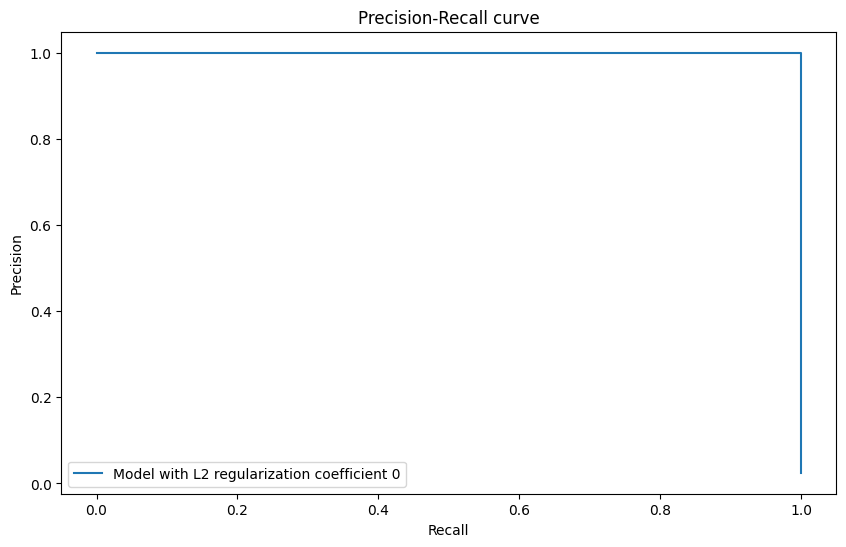

7/7 [==============================] - 0s 0s/step


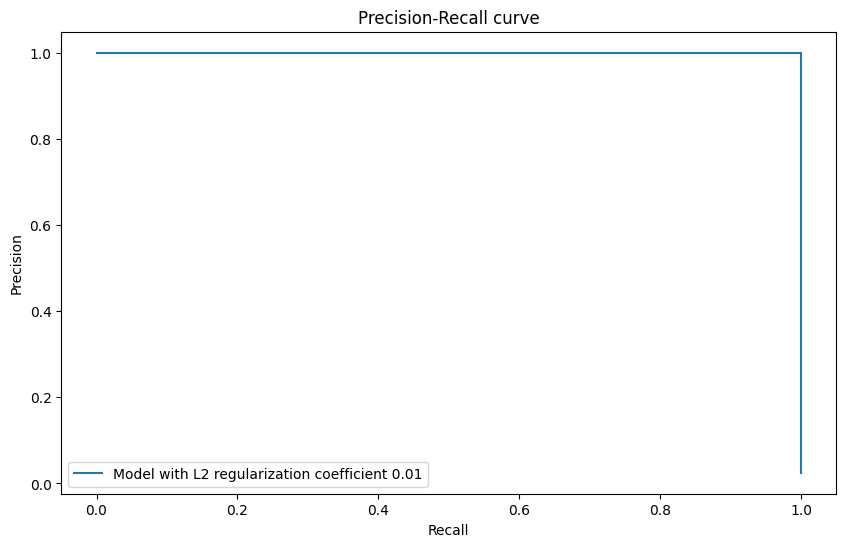

7/7 [==============================] - 0s 0s/step


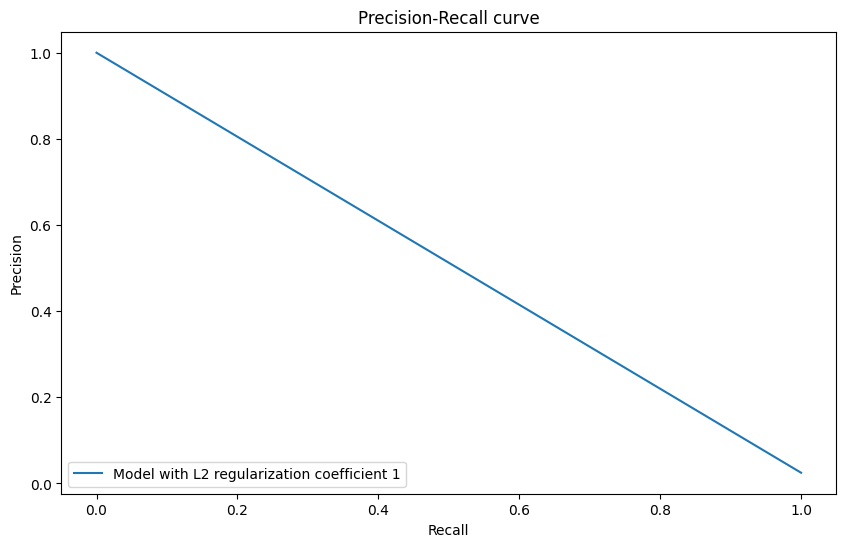

In [19]:
# write code to plot precision-recall curve
from sklearn.metrics import precision_recall_curve

# write code to plot precision-recall curve
# Plot Precision-Recall curve for each model
for coeff, model in models.items():
    y_prob = model.predict(X_val).ravel()
    precision, recall, _ = precision_recall_curve(y_val, y_prob)
    
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, label=f'Model with L2 regularization coefficient {coeff}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc='lower left')
    plt.show()

**Answer:** 

#### C. Utilizing your chosen model, plot recall and precision as a function of the threshold value on the validation data. Use two y-axes to visualize precision and recall on the same plot.

7/7 [==============================] - 0s 0s/step


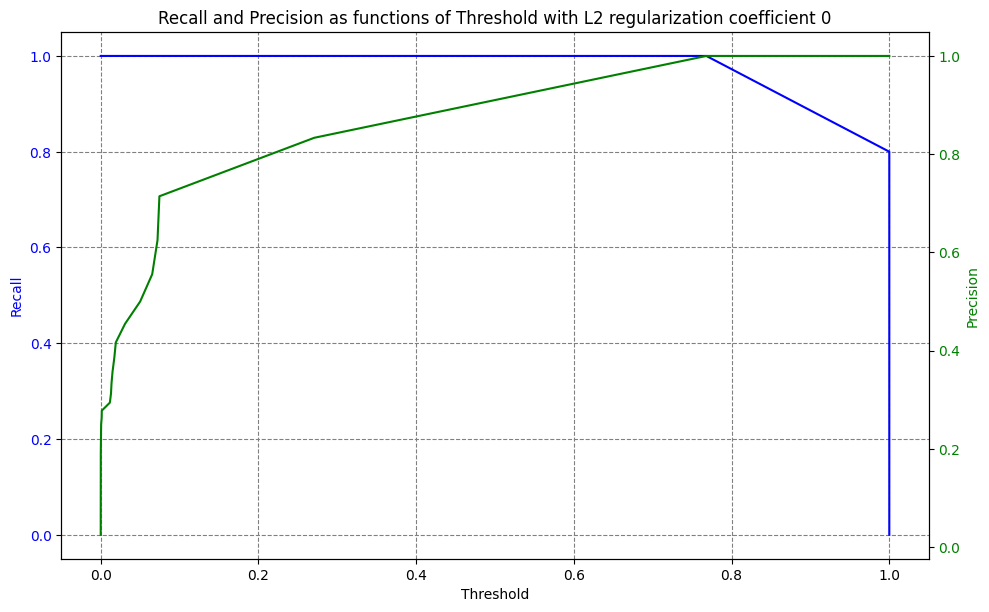

7/7 [==============================] - 0s 0s/step


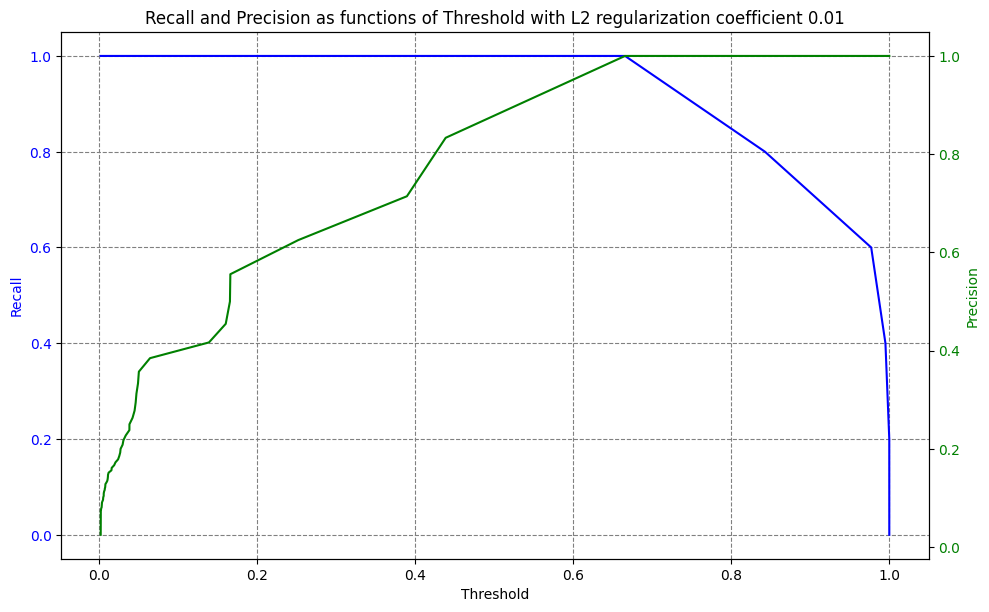

7/7 [==============================] - 0s 0s/step


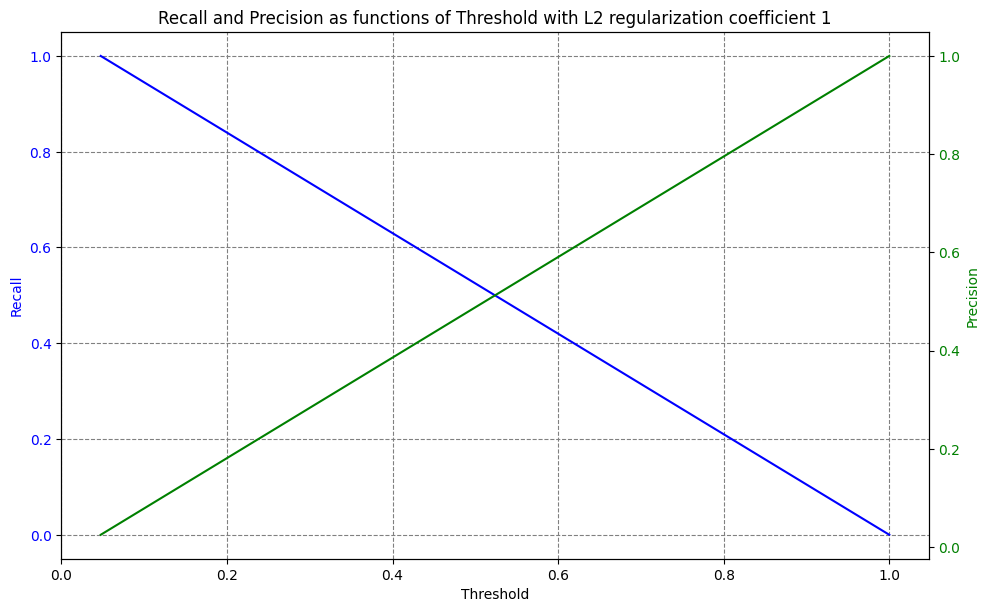

In [20]:
# write code to plot precision-recall curve
from sklearn.metrics import precision_recall_curve

# 9. Threshold Selection
for coeff, model in models.items():
    y_prob = model.predict(X_val).ravel()
    precision, recall, thresholds = precision_recall_curve(y_val, y_prob)
    thresholds = np.append(thresholds, 1)

    fig, ax1 = plt.subplots(figsize=(10, 6))
    plt.grid(True, which='both', axis='both', linestyle='--', color='gray')
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Recall', color='blue')
    ax1.plot(thresholds, recall, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Precision', color='green')
    ax2.plot(thresholds, precision, color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    fig.tight_layout()
    plt.title(f'Recall and Precision as functions of Threshold with L2 regularization coefficient {coeff}')
    plt.show()

**Answer:** Based on the accuracy scores alone, the model with a regularization factor of 0 (no regularization) has the highest accuracy on your validation set. However, a model with perfect accuracy might be overfitting the training data, especially if there is no regularization to prevent the model from becoming overly complex.

The model with a regularization factor of 0.1 has slightly lower accuracy, but the difference is very small. This model might be a better choice if it generalizes better to unseen data, thanks to the regularization.

The model with a regularization factor of 1 has the lowest accuracy of the three. This could be because the high regularization factor is causing the model to be too simple and underfit the data.

**Answer:** Based on the accuracy scores alone, the model with a regularization factor of 0 (no regularization) has the highest accuracy on your validation set. However, a model with perfect accuracy might be overfitting the training data, especially if there is no regularization to prevent the model from becoming overly complex.

The model with a regularization factor of 0.1 has slightly lower accuracy, but the difference is very small. This model might be a better choice if it generalizes better to unseen data, thanks to the regularization.

The model with a regularization factor of 1 has the lowest accuracy of the three. This could be because the high regularization factor is causing the model to be too simple and underfit the data.

#### D: Examine the effects of adjusting the threshold probability on the values of recall and precision. Specifically, analyze how increasing the threshold above 0.5 or decreasing it below 0.5 impacts these metrics. Discuss the implications of these adjustments for model performance and decision-making in the context of defect detection

**Answer:** The threshold in a binary classification model is a point above which a prediction is classified as one class and below which it is classified as the other class. By default, this threshold is often set at 0.5 for many models, but it can be adjusted based on the specific requirements of the problem at hand.

Increasing the Threshold:
- If you increase the threshold above 0.5, the model becomes more conservative about predicting the positive class (in this case, 'Defective'). This means that it will only predict 'Defective' when it is very certain, leading to fewer false positives and thus higher precision. However, this also means that the model might miss some actual 'Defective' instances, leading to more false negatives and thus lower recall.

Decreasing the Threshold:
- If you decrease the threshold below 0.5, the model becomes more liberal about predicting the positive class. This means that it will predict 'Defective' more often, even when it is not very certain, leading to more false positives and thus lower precision. However, this also means that the model is less likely to miss actual 'Defective' instances, leading to fewer false negatives and thus higher recall.

In the context of defect detection, the choice of threshold would depend on the relative costs of false positives and false negatives. If using a defective component has severe consequences (e.g., safety issues, system failures), you might prefer a lower threshold to maximize recall, even at the cost of precision. This would ensure that most defective components are identified, even if some normal components are incorrectly flagged as defective.

#### E. Use the plot generated in question C, and determine a threshold probability value for classification such that the chosen metric (either precision or recall) is equal or greater than 0.8 while keeping the other metric as high as possible. 

In [21]:
# write code to find and print out the threshold
from sklearn.metrics import precision_score, recall_score

threshold_precision = thresholds[np.argmax(precision >= 0.8)]
threshold_recall = thresholds[np.argmax(recall >= 0.8)]

print(threshold_precision)
print(threshold_recall)

1.0
0.04752171039581299


### 10. Final Evaluation

#### A. Compute the recall and precision on the test data using the selected threshold value.

In [28]:
# write code to compute recall and precision on test dataset
from sklearn.metrics import precision_score, recall_score


threshold = thresholds[np.argmax(precision >= 0.8)]
y_test_pred = (models[0].predict(X_test) > threshold).astype("int32").ravel()
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)

print(f"Precision on Test Data: {precision_test:.2f}")
print(f"Recall on Test Data: {recall_test:.2f}")

7/7 [==============================] - 0s 1ms/step
Precision on Test Data: 0.00
Recall on Test Data: 0.00


C:\Users\rohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### B. Is the performance satisfactory? Discuss any potential improvements that could be made.

The performance depends on the chosen metric (precision, recall, etc.) and the specific requirements of the problem.In this scenario I would consider the performance satfactory but additional improvements could be made:

- Fine-tuning hyperparameters (e.g., neural network architecture, regularization)
- Handling class imbalance (e.g., oversampling, undersampling)
- Exploring other evaluation metrics such as F1-score, specificity, or balanced accuracy.
- Collecting more data if possible to improve model generalization.